In [19]:
import multiprocessing
import numpy as np
import xarray as xr
import os
import pandas as pd
import netCDF4 as nc
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import linregress
from pymer4.models import Lmer
import math
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [73]:
data = pd.read_csv('./Q10_site_year_nighttime.csv')
unique_values = np.unique(data['site'])

In [74]:
len(unique_values)

254

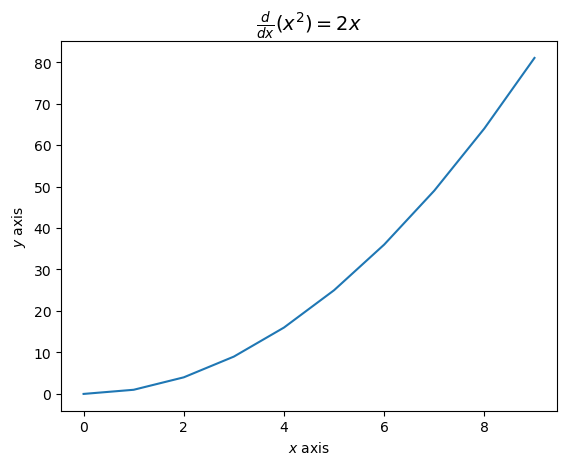

In [15]:

import matplotlib.pyplot as plt
 
# 创建一个图和坐标轴
fig, ax = plt.subplots()
 
# 设置x和y的值
x = range(10)
y = [i**2 for i in x]
 
# 绘制线图
ax.plot(x, y)
 
# 使用LaTeX格式添加公式
ax.set_title(r'$\alpha + \beta = \gamma$')  # 设置标题，包括数学公式
ax.set_xlabel(r'$x$ axis')  # 设置x轴标签，包括数学公式
ax.set_ylabel(r'$y$ axis')  # 设置y轴标签，包括数学公式
ax.set_title(r'$\frac{d}{dx} \left( x^2 \right) = 2x$', fontsize=14)  # 设置图形标题，包括数学公式
 
# 显示图形
plt.show()

In [ ]:
#ax1

In [20]:
data = pd.read_csv('./Q10_T_effect_nighttime.csv')
m,n = data.shape
Q10_T_ctg = []
Q10_T_ctg_all = []
Q10_all = []
T_ctg = []
T_all = []
std_ctg = []
for i in range(23):
    Q10i = []
    for j in range(m):
        if data['T'][j] == i*2-10 and data['pvalue'][j]<0.001 and data['num'][j]>=5 and data['SE'][j]<1:
            Q10i.append(data['Q10'][j])
            Q10_all.append(data['Q10'][j])
            T_all.append(i*2-10)
    if len(Q10i)>15:
        Q10_T_ctg.append(np.mean(Q10i))
        Q10_T_ctg_all.append(Q10i)
        std_ctg.append(np.std(Q10i))
        T_ctg.append(i*2-10)

In [22]:
for i in range(len(Q10_T_ctg)):
    print(T_ctg[i], Q10_T_ctg[i])

-10 2.5791993942497
-8 2.337136818265891
-6 2.2214404089803668
-4 2.1201887164505795
-2 2.0167313837790424
0 1.9334920061195324
2 1.8935438112064364
4 1.8263398631469552
6 1.778791477343724
8 1.7134302543971578
10 1.6330995036426028
12 1.5879254520667767
14 1.5314041673714427
16 1.4872119007161808
18 1.4536277019375772
20 1.432447266326328
22 1.4115530086269616
24 1.3731755595135484
26 1.366285197369791
28 1.3415510464750604
30 1.3231388770957673


R[write to console]: There were 50 or more warnings (use warnings() to see the first 50)
R[write to console]: 



In [ ]:
#ax2

In [3]:
data = pd.read_csv('./Q10_T_effect_nighttime.csv')
m,n = data.shape

site_list = []
for i in range(m):
    if data['site'][i] not in site_list:
        site_list.append(data['site'][i])

T_each_site = []
Q10_each_site = []
for i in range(len(site_list)):
    T_sitei = data['T'].values[(data['site'].values == site_list[i])]
    Q10_sitei = data['Q10'].values[(data['site'].values == site_list[i])]
    SE_sitei = data['SE'].values[(data['site'].values == site_list[i])]
    p_sitei = data['pvalue'].values[(data['site'].values == site_list[i])]
    num_sitei = data['num'].values[(data['site'].values == site_list[i])]
    
    T_sitei_list = []
    Q10_sitei_list = []
    for j in range(len(T_sitei)):
        if p_sitei[j] <0.001 and num_sitei[j] >=5 and SE_sitei[j] <=1:
            T_sitei_list.append(T_sitei[j])
            Q10_sitei_list.append(Q10_sitei[j])
    if len(T_sitei_list)>=10:
        T_each_site.append(T_sitei_list)
        Q10_each_site.append(Q10_sitei_list)

In [ ]:
#ax3

In [4]:
data = pd.read_csv('./Q10_T_effect_nighttime.csv')
m,n = data.shape

igbp = ['CRO', 'CSH', 'DBF', 'EBF', 'ENF', 'GRA', 'MF', 'OSH', 'SAV', 'WET', 'WSA']

T_ref=0

Q10_igbp = []
for i in range(len(igbp)):
    Q10_igbp_i = []
    for j in range(m):
        if data['igbp'][j] == igbp[i] and data['SE'][j] <=1 and (data['T'][j] == T_ref) and data['pvalue'][j]<0.01 and data['num'][j]>=5:  # or data['T'][j] == T_ref -2 or data['T'][j] == T_ref+2
            Q10_igbp_i.append(data['Q10'][j])
    Q10_igbp.append(Q10_igbp_i)

igbp_plot = []
Q10_igbp_plot = []

for i in range(len(igbp)):
    if len(Q10_igbp[i]) >= 5:
        igbp_plot.append(igbp[i])
        Q10_igbp_plot.append(Q10_igbp[i])

In [350]:
#ax4

In [5]:
data1 = pd.read_csv('./Site_mean_T.csv')
data2 = pd.read_csv('./Q10_T_effect_nighttime.csv')

T_3 = []
slope_3 = []
SE_3 = []
for i in range(23):
    T_ref= i*2-10

    Q10_T_ref = []
    T_mean = []

    for j in range(m):
        if data2['SE'][j] <=1 and (data2['T'][j] == T_ref) and data2['pvalue'][j]<0.01 and data2['num'][j]>=5:
            if np.sum(data1['site']==data2['site'][j])>=1:
                T_mean.append(np.nanmean(data1['Tm'].values[(data1['site']==data2['site'][j])]))
                Q10_T_ref.append(data2['Q10'][j])
    if len(T_mean)>=20:
        x = T_mean
        y = Q10_T_ref
        X = sm.add_constant(x)
        # 拟合线性回归模型
        model = sm.OLS(y, X)
        results = model.fit()
        # 获取斜率和斜率的标准误差
        slope = results.params[1]
        slope_se = results.bse[1]
    
        T_3.append(i*2-10)
        slope_3.append(slope)
        SE_3.append(slope_se)

C:\Users\111\AppData\Local\Temp\ipykernel_10872\3458911725.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Blues')
C:\Users\111\AppData\Local\Temp\ipykernel_10872\3458911725.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x_fit, y_fit, 'r', color='black', linewidth=2, label='Q$_{10}$=0.82e$^{\u22120.05T}$+1.14\nR$^{2}$ = '+str(round(r_squared,2)), zorder=4)
C:\Users\111\AppData\Local\Temp\ipykernel_10872\3458911725.py:62: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get

Text(-0.26, 1.05, 'd')

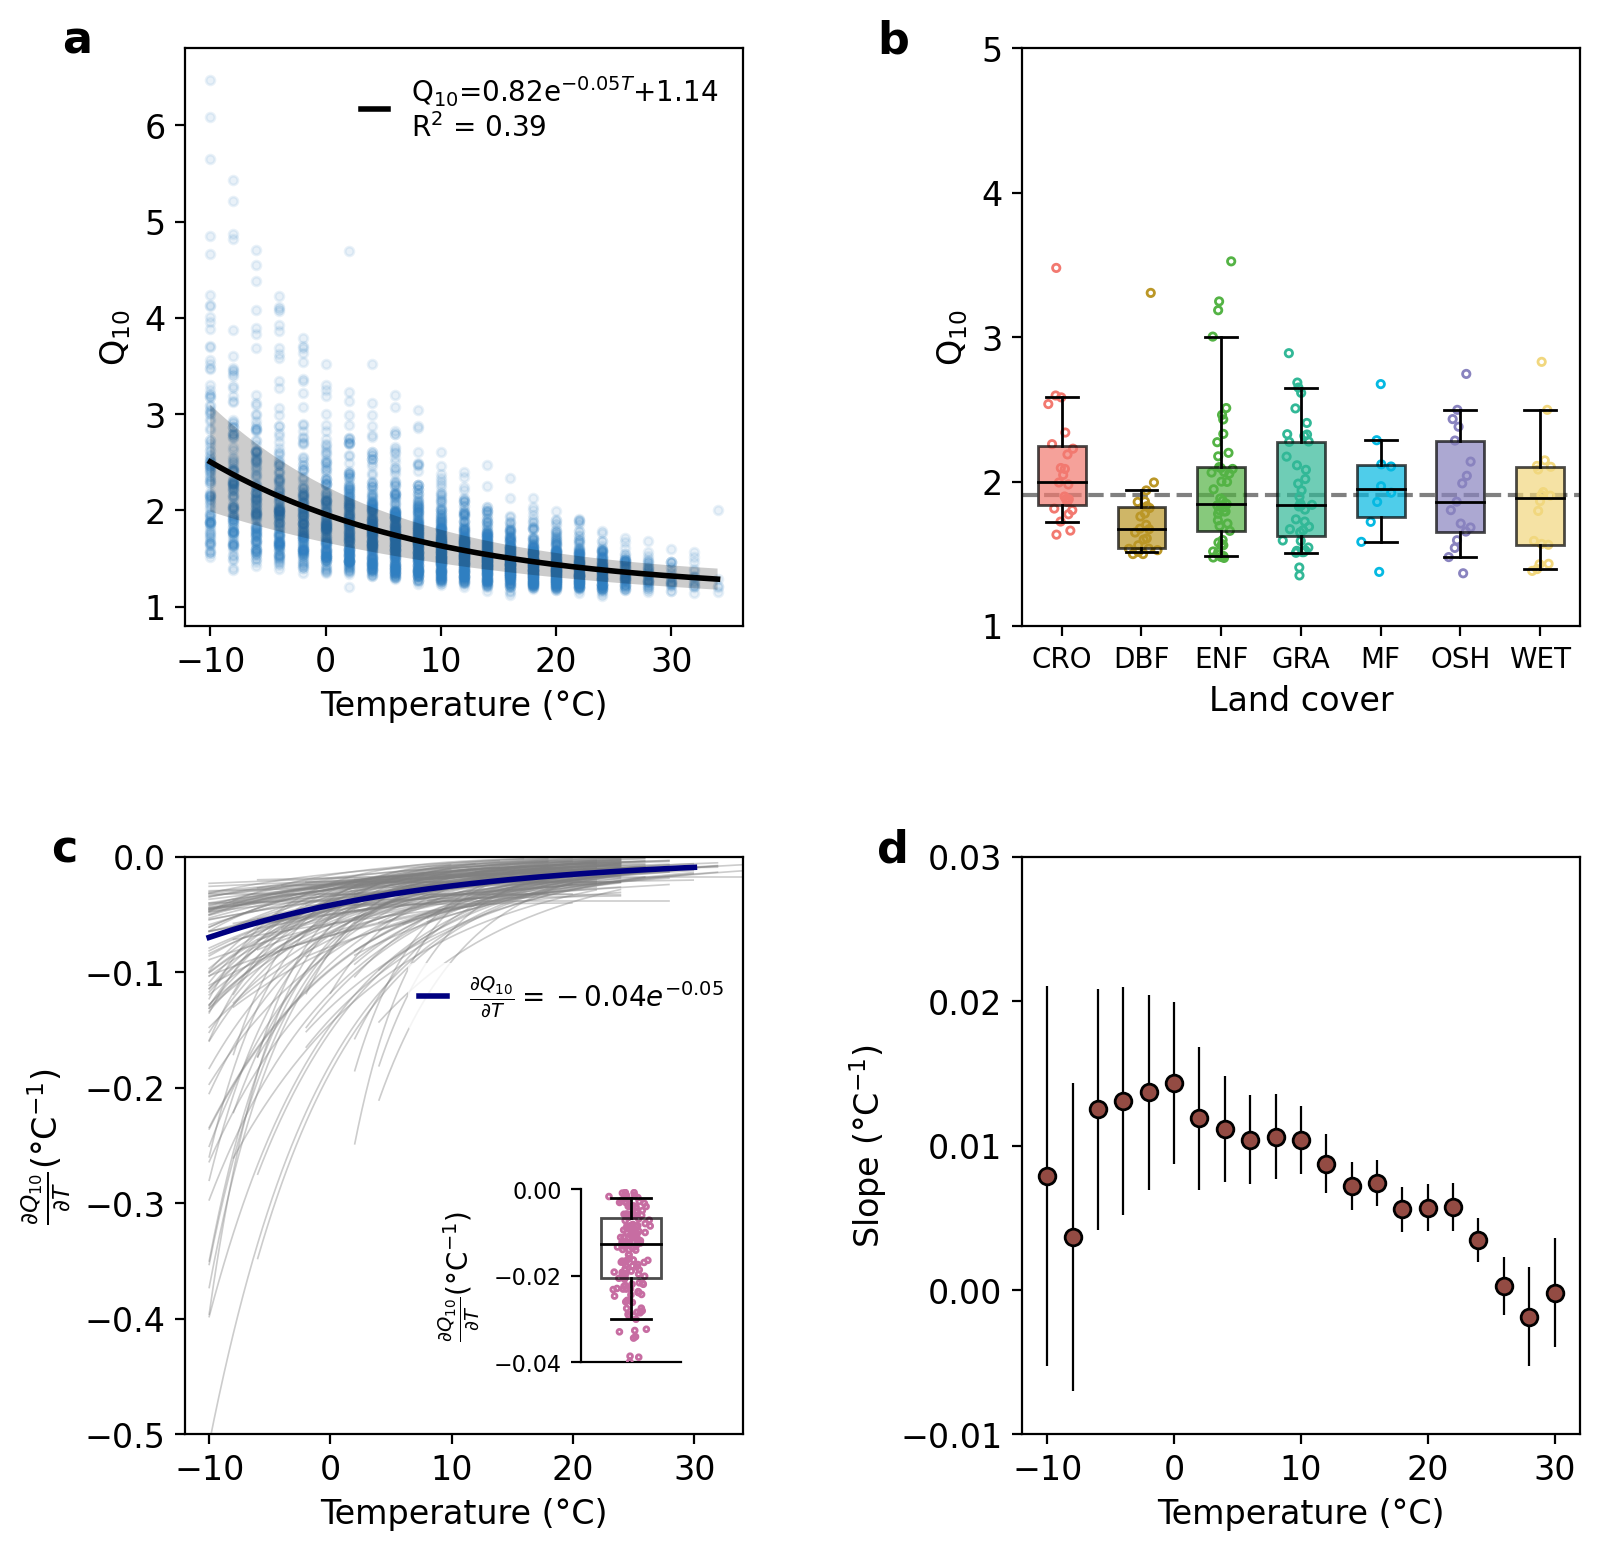

In [61]:
fig = plt.figure(figsize=(9, 9),dpi=200)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.4)
plt.rcParams['axes.unicode_minus'] = True
plt.rcParams['axes.linewidth'] = 0.8

#拟合线的导数
def exponential_func(x, a, b, c):
    return a * np.exp(-b * x) + c

#拟合线的导数
def exponential_func2(x, a, b):
    return a * np.exp(-b * x)

########################################################################################################################################################
ax = fig.add_subplot(2,2,1)
cm = plt.cm.get_cmap('Blues')

ax.scatter(T_all, Q10_all, s=10, marker= 'o', color='#2F7FC1', alpha=0.1)   

x_data = T_all
y_data = Q10_all
params, params_covariance = curve_fit(exponential_func, x_data, y_data)

# 计算置信区间
popt, pcov = curve_fit(exponential_func, x_data, y_data)
perr = np.sqrt(np.diag(pcov))
#lower = popt - 1.96 * perr
#upper = popt + 1.96 * perr

lower = popt - 2.58 * perr
upper = popt + 2.58 * perr  #99%

# 绘制拟合曲线
x_fit = np.linspace(-10, 34, 200)
y_fit = exponential_func(x_fit, params[0], params[1], params[2])

Q10_pred = exponential_func(np.array(T_all), params[0], params[1], params[2])
r_squared = r2_score(Q10_all, Q10_pred)

ax.plot(x_fit, y_fit, 'r', color='black', linewidth=2, label='Q$_{10}$=0.82e$^{\u22120.05T}$+1.14\nR$^{2}$ = '+str(round(r_squared,2)), zorder=4)


# 绘制置信区间
y_lower = exponential_func(x_fit, lower[0], lower[1], lower[2])
y_upper = exponential_func(x_fit, upper[0], upper[1], upper[2])
ax.fill_between(x_fit, y_lower, y_upper, color='black', alpha=0.2, edgecolor='none')

ax.legend(fontsize=10, edgecolor='white', loc='upper right', frameon=True, handlelength = 1)

ax.set_xticks(np.linspace(-10,30,5))
ax.set_yticks(np.linspace(1,6,6))
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_xlabel('Temperature (°C)',size = 12)
ax.set_ylabel('Q$_{10}$',size = 12)
ax.set_ylim(0.8,6.8)
ax.text(-0.22, 1.05, "a", transform=ax.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')

####################################################################################################################################################
ax = fig.add_subplot(2,2,3)
cm = plt.cm.get_cmap('Blues')

a=0
d_q10_d_T_20 = []
for i in range(len(T_each_site)):
    params, params_covariance = curve_fit(exponential_func, T_each_site[i], Q10_each_site[i], maxfev=10000)
    x_fit = np.arange(np.min(T_each_site[i]), np.max(T_each_site[i]), 0.1)
    y_fit = exponential_func(x_fit, params[0], params[1], params[2])
    ss_total = np.sum((Q10_each_site[i] - np.mean(Q10_each_site[i]))**2)
    ss_residual = np.sum((Q10_each_site[i] - exponential_func(np.array(T_each_site[i]), params[0], params[1], params[2]))**2)
    r_squared = 1 - (ss_residual / ss_total)
    d_q10_d_T = exponential_func2(np.array(x_fit), -params[1]*params[0], params[1])
    if r_squared>0.9 and (max(T_each_site[i])-min(T_each_site[i]))>=20:
        ax.plot(x_fit, d_q10_d_T, 'r', color='gray', alpha=0.4, linewidth=0.6, zorder=0)
        d_q10_d_T_20.append(exponential_func2(20, -params[1]*params[0], params[1]))
        a+=1
ax_pos = ax.get_position()
pos = [ax_pos.x0+0.22, ax_pos.y0+0.04, 0.18*ax_pos.width, 0.3*ax_pos.height]
ax1 = fig.add_subplot(pos)
boxplot = ax1.boxplot(d_q10_d_T_20,
                    whis = (5,95),
                    vert=True,  
                    patch_artist=True,
                    showfliers = False,
                    showmeans =False,
                    medianprops = {'color':'black'},
                    widths=0.6,
                    capwidths=0.4,
                    labels = [' '],
                    zorder=10
                    )
box_alpha = 0.7

for patch in boxplot['boxes']:
    patch.set_facecolor('none')
    patch.set_alpha(box_alpha)
    patch.set_edgecolor('black')  # 设置箱体边框颜色为黑色
    patch.set_linewidth(1)

random_x = np.random.normal(1, 0.08, len(d_q10_d_T_20))
ax1.scatter(random_x, d_q10_d_T_20, s=3, edgecolor='#C76DA2', facecolor='none', zorder=3) 
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
#ax1.spines['bottom'].set_visible(False)
ax1.set_xticks([])
ax1.set_yticks(np.linspace(-0.04,0,3))
ax1.tick_params(axis='y', labelsize=8)
ax1.set_ylim(-0.04,0)
text = r"$\frac{\partial Q_{10}}{\partial T}$(°C$^{-1}$)"
ax1.set_ylabel(text, fontsize=10)

x_data = T_all
y_data = Q10_all
params, params_covariance = curve_fit(exponential_func, x_data, y_data)

# 绘制拟合曲线
x_fit = np.linspace(-10, 30, 200)
y_fit = exponential_func2(x_fit, -params[0]*params[1], params[1])
text = r"$\frac{\partial Q_{10}}{\partial T} = -0.04e^{-0.05}$"
ax.plot(x_fit, y_fit, 'r', color='navy', linewidth=2, label=text)


#ax.text(20, -0.12, text, fontsize=12, va='center', ha='center')
ax.legend(fontsize=10, edgecolor='none', loc=[0.4,0.7], frameon=True, handlelength = 1)

ax.set_xticks(np.linspace(-10,30,5))
ax.set_yticks(np.linspace(-0.5,0,6))
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_xlabel('Temperature (°C)',size = 12)
#ax.set_ylabel('\u2202Q$_{10}$/\u2202T',size = 12)
text = r"$\frac{\partial Q_{10}}{\partial T}$(°C$^{-1}$)"
ax.set_ylabel(text, size = 12)
ax.set_xlim(-12, 34)
ax.set_ylim(-0.5, 0)
ax.text(-0.24, 1.05, "c", transform=ax.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')


#############################################################################################################################################
colors = ['#F27970', '#BB9727', '#54B345', '#32B897', '#05B9E2', '#8983BF', '#F1D77E', '#C76DA2', '#934B43','#5F97D2']

ax = fig.add_subplot(2,2,2)

boxplot = ax.boxplot(Q10_igbp_plot,
                whis = (5,95),
                vert=True,  
                patch_artist=True,
                showfliers = False,
                showmeans =False,
                medianprops = {'color':'black'},
                widths=0.6,
                capwidths=0.4,
                labels = igbp_plot,
                zorder=10
            )


box_alpha = 0.7
i=0
for patch in boxplot['boxes']:
    patch.set_facecolor(colors[i])
    patch.set_alpha(box_alpha)
    patch.set_edgecolor('black')  # 设置箱体边框颜色为黑色
    patch.set_linewidth(1)
    i+=1


for i in range(len(igbp_plot)):
    random_x = np.random.normal(i+1, 0.08, len(Q10_igbp_plot[i]))
    ax.scatter(random_x, Q10_igbp_plot[i], s=7, edgecolor=colors[i], facecolor='none', zorder=3) 
    
ax.set_yticks(np.linspace(1,5,5))
ax.tick_params(axis='x', labelsize=10, rotation=0)
ax.tick_params(axis='y', labelsize=12)
ax.set_xlabel('Land cover',size = 12)
ax.set_ylabel('Q$_{10}$',size = 12)

ax.set_ylim(1, 5)
ax.text(-0.26, 1.05, "b", transform=ax.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')
ax.axhline(y=1.91, color='gray', linestyle='--')


#############################################################################################################################################
ax = fig.add_subplot(2,2,4)


ax.errorbar(T_3,
             slope_3,
             SE_3,
             fmt='o',          #marker='o',c='',edgecolors='g'
             color = '#934B43',
             mec = 'black',
             mew = 1,
             ecolor = 'black',
             elinewidth = 0.8,
             capsize = 0,
             markersize = 6,
             );

ax.set_xticks(np.linspace(-10,30,5))
ax.set_yticks(np.linspace(-0.01,0.03,5))
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_xlabel('Temperature (°C)',size = 12)
ax.set_ylabel('Slope (°C$^{\u22121}$)',size = 12)
ax.set_ylim(-0.01,0.03)
ax.text(-0.26, 1.05, "d", transform=ax.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')


In [3]:
data = pd.read_csv('./Q10_T_effect_nighttime.csv')
m,n = data.shape

igbp = ['CRO', 'CSH', 'DBF', 'EBF', 'ENF', 'GRA', 'MF', 'OSH', 'SAV', 'WET', 'WSA']

T_ref=-10
Q10_igbp1 = []
for i in range(len(igbp)):
    Q10_igbp_i = []
    for j in range(m):
        if data['igbp'][j] == igbp[i] and data['SE'][j] <=1 and (data['T'][j] == T_ref) and data['pvalue'][j]<0.01 and data['num'][j]>=5:  # or data['T'][j] == T_ref -2 or data['T'][j] == T_ref+2
            Q10_igbp_i.append(data['Q10'][j])
    Q10_igbp1.append(Q10_igbp_i)

igbp_plot1 = []
Q10_igbp_plot1 = []

for i in range(len(igbp)):
    if len(Q10_igbp1[i]) >= 8:
        igbp_plot1.append(igbp[i])
        Q10_igbp_plot1.append(Q10_igbp1[i])
        
#######################################################################################################################################################
T_ref=10
Q10_igbp2 = []
for i in range(len(igbp)):
    Q10_igbp_i = []
    for j in range(m):
        if data['igbp'][j] == igbp[i] and data['SE'][j] <=1 and (data['T'][j] == T_ref) and data['pvalue'][j]<0.01 and data['num'][j]>=5:  # or data['T'][j] == T_ref -2 or data['T'][j] == T_ref+2
            Q10_igbp_i.append(data['Q10'][j])
    Q10_igbp2.append(Q10_igbp_i)

igbp_plot2 = []
Q10_igbp_plot2 = []

for i in range(len(igbp)):
    if len(Q10_igbp2[i]) >= 8:
        igbp_plot2.append(igbp[i])
        Q10_igbp_plot2.append(Q10_igbp2[i])

        
#######################################################################################################################################################
T_ref=20
Q10_igbp3 = []
for i in range(len(igbp)):
    Q10_igbp_i = []
    for j in range(m):
        if data['igbp'][j] == igbp[i] and data['SE'][j] <=1 and (data['T'][j] == T_ref) and data['pvalue'][j]<0.01 and data['num'][j]>=5:  # or data['T'][j] == T_ref -2 or data['T'][j] == T_ref+2
            Q10_igbp_i.append(data['Q10'][j])
    Q10_igbp3.append(Q10_igbp_i)

igbp_plot3 = []
Q10_igbp_plot3 = []

for i in range(len(igbp)):
    if len(Q10_igbp3[i]) >= 8:
        igbp_plot3.append(igbp[i])
        Q10_igbp_plot3.append(Q10_igbp3[i])


Text(0.75, 0.96, '20°C')

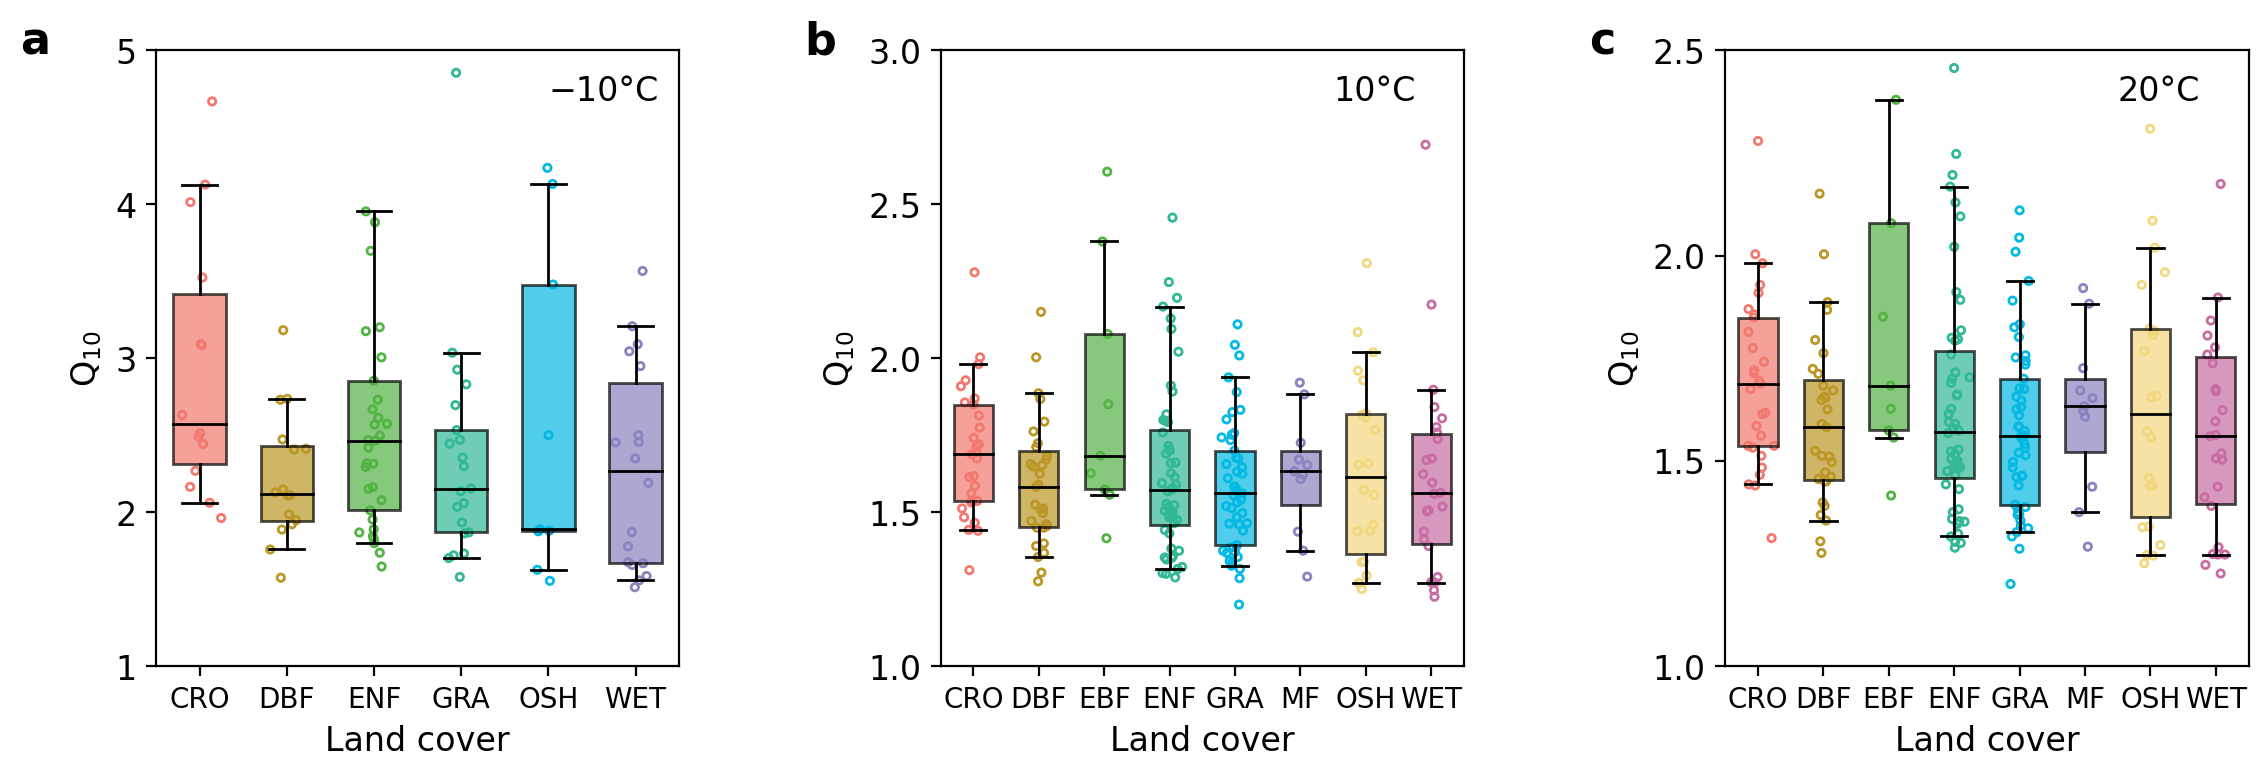

In [16]:
fig = plt.figure(figsize=(13.5, 4),dpi=200)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.4)
plt.rcParams['axes.unicode_minus'] = True
plt.rcParams['axes.linewidth'] = 0.8

#############################################################################################################################################
colors = ['#F27970', '#BB9727', '#54B345', '#32B897', '#05B9E2', '#8983BF', '#F1D77E', '#C76DA2', '#934B43','#5F97D2']

ax = fig.add_subplot(1,3,1)

boxplot = ax.boxplot(Q10_igbp_plot1,
                whis = (5,95),
                vert=True,  
                patch_artist=True,
                showfliers = False,
                showmeans =False,
                medianprops = {'color':'black'},
                widths=0.6,
                capwidths=0.4,
                labels = igbp_plot1,
                zorder=10
            )


box_alpha = 0.7
i=0
for patch in boxplot['boxes']:
    patch.set_facecolor(colors[i])
    patch.set_alpha(box_alpha)
    patch.set_edgecolor('black')  # 设置箱体边框颜色为黑色
    patch.set_linewidth(1)
    i+=1


for i in range(len(igbp_plot1)):
    random_x = np.random.normal(i+1, 0.08, len(Q10_igbp_plot1[i]))
    ax.scatter(random_x, Q10_igbp_plot1[i], s=7, edgecolor=colors[i], facecolor='none', zorder=3) 
    
ax.set_yticks(np.linspace(1,5,5))
ax.tick_params(axis='x', labelsize=10, rotation=0)
ax.tick_params(axis='y', labelsize=12)
ax.set_xlabel('Land cover',size = 12)
ax.set_ylabel('Q$_{10}$',size = 12)

ax.set_ylim(1, 5)
ax.text(-0.26, 1.05, "a", transform=ax.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')
#ax.axhline(y=1.91, color='gray', linestyle='--')
ax.text(0.75, 0.96, "\u221210°C", transform=ax.transAxes,
         fontsize=12, fontweight='normal', va='top', ha='left')

######################################################################################################################################
ax = fig.add_subplot(1,3,2)

boxplot = ax.boxplot(Q10_igbp_plot2,
                whis = (5,95),
                vert=True,  
                patch_artist=True,
                showfliers = False,
                showmeans =False,
                medianprops = {'color':'black'},
                widths=0.6,
                capwidths=0.4,
                labels = igbp_plot2,
                zorder=10
            )


box_alpha = 0.7
i=0
for patch in boxplot['boxes']:
    patch.set_facecolor(colors[i])
    patch.set_alpha(box_alpha)
    patch.set_edgecolor('black')  # 设置箱体边框颜色为黑色
    patch.set_linewidth(1)
    i+=1


for i in range(len(igbp_plot2)):
    random_x = np.random.normal(i+1, 0.08, len(Q10_igbp_plot2[i]))
    ax.scatter(random_x, Q10_igbp_plot2[i], s=7, edgecolor=colors[i], facecolor='none', zorder=3) 
    
ax.set_yticks(np.linspace(1,3,5))
ax.tick_params(axis='x', labelsize=10, rotation=0)
ax.tick_params(axis='y', labelsize=12)
ax.set_xlabel('Land cover',size = 12)
ax.set_ylabel('Q$_{10}$',size = 12)

ax.set_ylim(1, 3)
ax.text(-0.26, 1.05, "b", transform=ax.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')
#ax.axhline(y=1.91, color='gray', linestyle='--')
ax.text(0.75, 0.96, "10°C", transform=ax.transAxes,
         fontsize=12, fontweight='normal', va='top', ha='left')

######################################################################################################################################
ax = fig.add_subplot(1,3,3)

boxplot = ax.boxplot(Q10_igbp_plot2,
                whis = (5,95),
                vert=True,  
                patch_artist=True,
                showfliers = False,
                showmeans =False,
                medianprops = {'color':'black'},
                widths=0.6,
                capwidths=0.4,
                labels = igbp_plot2,
                zorder=10
            )


box_alpha = 0.7
i=0
for patch in boxplot['boxes']:
    patch.set_facecolor(colors[i])
    patch.set_alpha(box_alpha)
    patch.set_edgecolor('black')  # 设置箱体边框颜色为黑色
    patch.set_linewidth(1)
    i+=1


for i in range(len(igbp_plot2)):
    random_x = np.random.normal(i+1, 0.08, len(Q10_igbp_plot2[i]))
    ax.scatter(random_x, Q10_igbp_plot2[i], s=7, edgecolor=colors[i], facecolor='none', zorder=3) 
    
ax.set_yticks(np.linspace(1,2.5,4))
ax.tick_params(axis='x', labelsize=10, rotation=0)
ax.tick_params(axis='y', labelsize=12)
ax.set_xlabel('Land cover',size = 12)
ax.set_ylabel('Q$_{10}$',size = 12)

ax.set_ylim(1, 2.5)
ax.text(-0.26, 1.05, "c", transform=ax.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')
ax.text(0.75, 0.96, "20°C", transform=ax.transAxes,
         fontsize=12, fontweight='normal', va='top', ha='left')

#ax.axhline(y=1.91, color='gray', linestyle='--')

In [17]:
0.92/0.11

8.363636363636363

C:\Users\111\AppData\Local\Temp\ipykernel_3296\1517819967.py:12: RuntimeWarning: Mean of empty slice
  T_mi = np.nanmean(T_mi_list)
C:\Users\111\AppData\Local\Temp\ipykernel_3296\1517819967.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Blues')


Text(0, 0.5, 'Correlation coefficient')

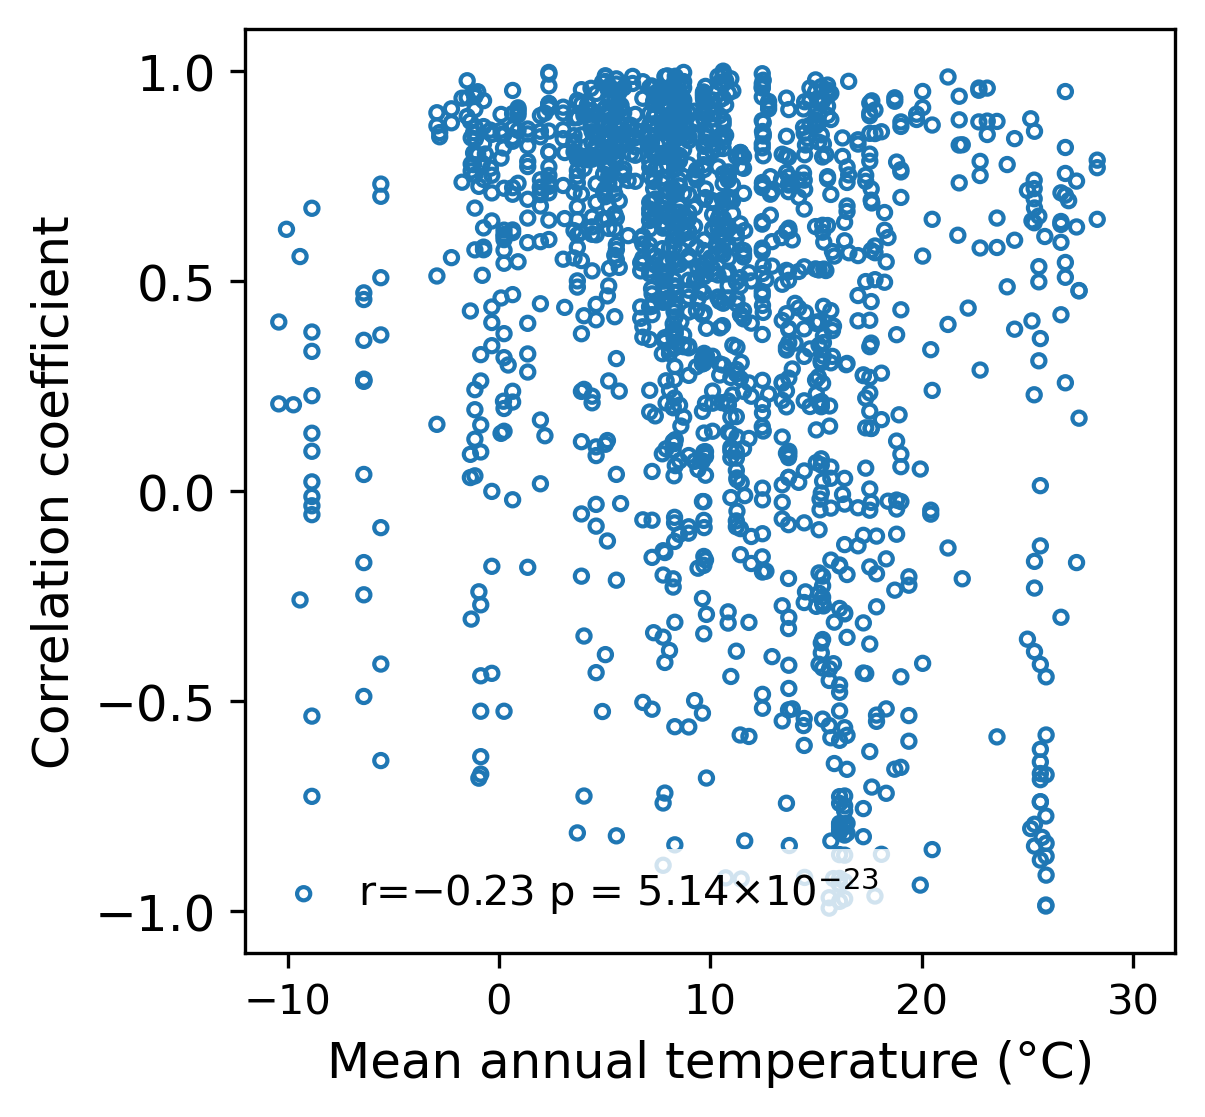

In [2]:
data1 = pd.read_csv('./Q10_site_year_nighttime.csv')
data2 = pd.read_csv('./Site_mean_T.csv')

m,n = data1.shape
cor = []
T_m = []
for i in range(m):
    if np.isnan(data1['cor'][i]) != 1:
        T_mi_list = data2['Tm'].values[(data2['site'].values == data1['site'][i])]
        yeari_list = data2['year'].values[(data2['site'].values == data1['site'][i])]
        #T_mi = T_mi_list[(yeari_list==data1['year'][i])]
        T_mi = np.nanmean(T_mi_list)
        if np.isnan(T_mi) != 1: 
        #if len(T_mi) == 1:
            #T_mi = T_mi[0]
            cor.append(data1['cor'][i])
            T_m.append(T_mi)
            
fig = plt.figure(figsize=(4, 4),dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.4)
plt.rcParams['axes.unicode_minus'] = True
plt.rcParams['axes.linewidth'] = 0.8

ax = fig.add_subplot(1,1,1)
cm = plt.cm.get_cmap('Blues')

ax.scatter(T_m, cor, s=10, marker='o', facecolor='none', edgecolor='tab:blue', label = "r=\u22120.23 p = 5.14×10$^{\u221223}$")

ax.legend(fontsize=10, edgecolor='none', loc='lower left', frameon=True, handlelength = 1)

ax.set_xticks(np.linspace(-10,30,5))
ax.set_yticks(np.linspace(-1,1,5))
ax.set_xlim(-12, 32)
ax.set_ylim(-1.1, 1.1)
ax.tick_params(axis='x', labelsize=10, rotation=0)
ax.tick_params(axis='y', labelsize=12)
ax.set_xlabel('Mean annual temperature (°C)',size = 12)
ax.set_ylabel('Correlation coefficient',size = 12)


In [34]:
pearsonr(T_m, cor)

PearsonRResult(statistic=-0.2518324216519914, pvalue=5.141020529859365e-23)

In [43]:
for i in range(len(Q10_igbp_plot)):
    print(np.percentile(Q10_igbp_plot[i],95)-np.percentile(Q10_igbp_plot[i],5))

0.9282174238070546
0.4924064401883028
1.6705855056947332
1.1580054624551173
1.0321988082701952
1.0919979251839473
1.154761792400405


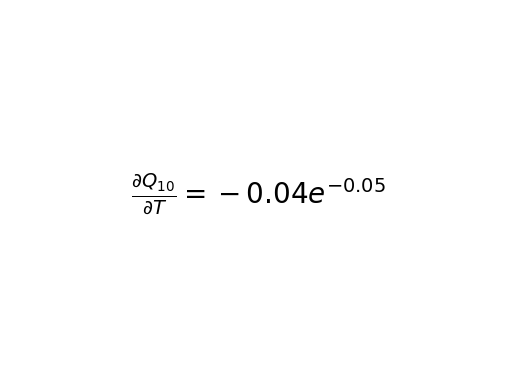

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# 绘制一个空的坐标轴
ax.axis('off')

# 设置文本注释的位置和内容
x = 0.5
y = 0.5
text = r"$\frac{\partial Q_{10}}{\partial T} = -0.04e^{-0.05}$"

# 添加文本注释
ax.text(x, y, text, fontsize=20, va='center', ha='center')

plt.show()

In [62]:
-params[1]*params[0], params[1]

(-0.04176516664950399, 0.05115019818264873)

In [18]:
data = pd.read_csv('./Q10_T_effect_nighttime.csv')
m,n = data.shape
Q10_T_ctg = []
Q10_all = []
T_ctg = []
T_all = []
std_ctg = []
for i in range(23):
    Q10i = []
    for j in range(m):
        if data['T'][j] == i*2-10 and data['pvalue'][j]<0.001 and data['num'][j]>=5 and data['SE'][j]<1:
            Q10i.append(data['Q10'][j])
            Q10_all.append(data['Q10'][j])
            T_all.append(i*2-10)
    if len(Q10i)>15:
        Q10_T_ctg.append(np.mean(Q10i))
        std_ctg.append(np.std(Q10i))
        T_ctg.append(i*2-10)

In [28]:
data = pd.read_csv('./Q10_T_effect_nighttime.csv')
m,n = data.shape

site_list = []
for i in range(m):
    if data['site'][i] not in site_list:
        site_list.append(data['site'][i])

T_each_site = []
Q10_each_site = []
for i in range(len(site_list)):
    T_sitei = data['T'].values[(data['site'].values == site_list[i])]
    Q10_sitei = data['Q10'].values[(data['site'].values == site_list[i])]
    SE_sitei = data['SE'].values[(data['site'].values == site_list[i])]
    p_sitei = data['pvalue'].values[(data['site'].values == site_list[i])]
    num_sitei = data['num'].values[(data['site'].values == site_list[i])]
    
    T_sitei_list = []
    Q10_sitei_list = []
    for j in range(len(T_sitei)):
        if p_sitei[j] <0.001 and num_sitei[j] >=5 and SE_sitei[j] <=1:
            T_sitei_list.append(T_sitei[j])
            Q10_sitei_list.append(Q10_sitei[j])
    if len(T_sitei_list)>=10:
        T_each_site.append(T_sitei_list)
        Q10_each_site.append(Q10_sitei_list)

C:\Users\111\AppData\Local\Temp\ipykernel_10872\1489757222.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Blues')
C:\Users\111\AppData\Local\Temp\ipykernel_10872\1489757222.py:11: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
C:\Users\111\AppData\Local\Temp\ipykernel_10872\1489757222.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x_fit, y_fit, 'r', color='gray', alpha=0.4, linewidth=0.6, zorder=0)
C:\Users\111\AppData\Local\Temp\ipykernel_10872\1489757222.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take pre

Text(-0.22, 1.05, '')

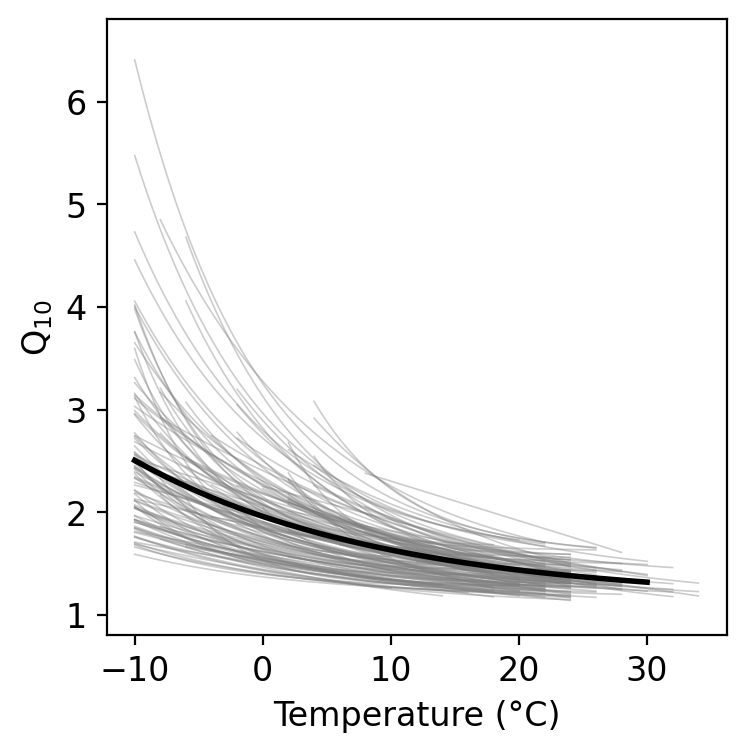

In [41]:
fig = plt.figure(figsize=(4, 4),dpi=200)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.4)
plt.rcParams['axes.unicode_minus'] = True
plt.rcParams['axes.linewidth'] = 0.8

ax = fig.add_subplot(1,1,1)
cm = plt.cm.get_cmap('Blues')

#拟合线的导数
def exponential_func(x, a, b, c):
    return a * np.exp(-b * x) + c

#拟合线的导数
def exponential_func2(x, a, b):
    return a * np.exp(-b * x)


a=0
for i in range(len(T_each_site)):
    params, params_covariance = curve_fit(exponential_func, T_each_site[i], Q10_each_site[i], maxfev=10000)
    x_fit = np.linspace(np.min(T_each_site[i]), np.max(T_each_site[i]), 100)
    y_fit = exponential_func(x_fit, params[0], params[1], params[2])
    ss_total = np.sum((Q10_each_site[i] - np.mean(Q10_each_site[i]))**2)
    ss_residual = np.sum((Q10_each_site[i] - exponential_func(np.array(T_each_site[i]), params[0], params[1], params[2]))**2)
    r_squared = 1 - (ss_residual / ss_total)
    if r_squared>0.9 and (max(T_each_site[i])-min(T_each_site[i]))>=20:
        ax.plot(x_fit, y_fit, 'r', color='gray', alpha=0.4, linewidth=0.6, zorder=0)
        a+=1
    
x_data = T_all
y_data = Q10_all
params, params_covariance = curve_fit(exponential_func, x_data, y_data)

# 绘制拟合曲线
x_fit = np.linspace(-10, 30, 200)
y_fit = exponential_func(x_fit, params[0], params[1], params[2])
ax.plot(x_fit, y_fit, 'r', color='black', linewidth=2, )

ax.legend(fontsize=12, edgecolor='white', loc='upper right', frameon=True, handlelength = 1)
ax.set_xticks(np.linspace(-10,30,5))
ax.set_yticks(np.linspace(1,6,6))
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_xlabel('Temperature (°C)',size = 12)
ax.set_ylabel('Q$_{10}$',size = 12)
ax.set_ylim(-12,32)
ax.set_ylim(0.8,6.8)
ax.text(-0.22, 1.05, "", transform=ax.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')


In [42]:
a

110

In [25]:
data = pd.read_csv('./Q10_T_effect_nighttime.csv')
m,n = data.shape

Q10_below_0 = []
for j in range(m):
    if data['igbp'][j] == igbp[i] and data['SE'][j] <=1 and (data['T'][j] >= -10) and (data['T'][j] <= 40) and data['pvalue'][j]<0.01 and data['num'][j]>=10:
        Q10_below_0.append(data['Q10'][j])

data2 = pd.read_excel('C:/Users/111/Desktop/Q10_ref.xlsx')
Q10_ref = data2['Q10'].values[(np.isnan(data2['Q10'].values) != 1)]

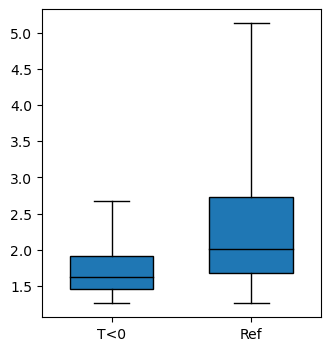

In [26]:
fig = plt.figure(figsize=(9, 4),dpi=100)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.4)
plt.rcParams['axes.unicode_minus'] = True
plt.rcParams['axes.linewidth'] = 0.8

ax = fig.add_subplot(1,2,1)

boxplot = ax.boxplot([Q10_below_0, Q10_ref],
                whis = (5,95),
                vert=True,  
                patch_artist=True,
                showfliers = False,
                showmeans =False,
                #meanprops={'marker': '^', 'markersize': 6, 'color':'red'},
                medianprops = {'color':'black'},
                widths=0.6,
                capwidths=0.25,
                labels = ['T<0', 'Ref']
            )

In [ ]:
params, params_covariance = curve_fit(exponential_func, x_data, y_data)

# 计算置信区间
popt, pcov = curve_fit(exponential_func, x_data, y_data)
perr = np.sqrt(np.diag(pcov))
lower = popt - 1.96 * perr
upper = popt + 1.96 * perr

# 绘制原始数据散点图
plt.scatter(x_data, y_data, label='Data')

# 绘制拟合曲线
x_fit = np.linspace(0, 6, 100)
y_fit = exponential_func(x_fit, params[0], params[1], params[2])
plt.plot(x_fit, y_fit, 'r', label='Fit')

# 绘制置信区间
y_lower = exponential_func(x_fit, lower[0], lower[1], lower[2])
y_upper = exponential_func(x_fit, upper[0], upper[1], upper[2])
plt.fill_between(x_fit, y_lower, y_upper, color='gray', alpha=0.5, label='95% Confidence Interval')


In [51]:
len(T_ctg)

22

In [52]:
len(Q10_upper)

22

0.3952645135244989


C:\Users\111\AppData\Local\Temp\ipykernel_21260\2663579754.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Blues')


Text(-0.22, 1.05, 'b')

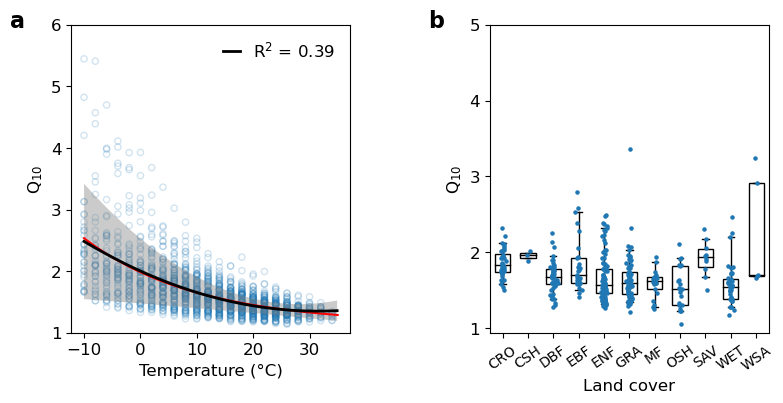

In [46]:
fig = plt.figure(figsize=(9, 4),dpi=100)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.4)
plt.rcParams['axes.unicode_minus'] = True
plt.rcParams['axes.linewidth'] = 0.8

ax = fig.add_subplot(1,2,1)
cm = plt.cm.get_cmap('Blues')


ax.scatter(T_all, Q10_all, s=20, marker= 'o', edgecolor='tab:blue', facecolor='none', alpha=0.2)


ax.set_ylim(1,5)

x = T_all
y = Q10_all
coefficients = np.polyfit(x, y, 2)
p = np.poly1d(coefficients)
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - p(x))**2)
r_squared = 1 - (ss_residual / ss_total)
x_plot = np.arange(-10,35,0.1)
ax.plot(x_plot, p(x_plot), color='black', linewidth=2, label='R$^{2}$ = '+str(round(r_squared,2)), zorder=4)
ax.legend(fontsize=12, edgecolor='white', loc='upper right', frameon=True, handlelength = 1)


#上下边界线
Q10_upper = []
Q10_lower = []
for i in range(len(Q10_T_ctg)):
    Q10_upper.append(p(T_ctg)[i] + std_ctg[i])
    Q10_lower.append(p(T_ctg)[i] - std_ctg[i])

x = T_ctg
y = Q10_upper
coefficients = np.polyfit(x, y, 2)
p1 = np.poly1d(coefficients)
x_plot = np.arange(-10,35,0.1)

y = Q10_lower
coefficients = np.polyfit(x, y, 2)
p2 = np.poly1d(coefficients)
x_plot = np.arange(-10,35,0.1)

ax.fill_between(x_plot, p1(x_plot), p2(x_plot), where=None, interpolate=False, color='tab:gray', alpha=0.4, edgecolor='none')

ax.set_xticks(np.linspace(-10,30,5))
ax.set_yticks(np.linspace(1,6,6))
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_xlabel('Temperature (°C)',size = 12)
ax.set_ylabel('Q$_{10}$',size = 12)

ax.text(-0.22, 1.05, "a", transform=ax.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')

def exponential_func(x, a, b, c):
    return a * np.exp(-b * x) + c

params, params_covariance = curve_fit(exponential_func, T_all, Q10_all)

x_fit = np.linspace(-10, 35, 100)
y_fit = exponential_func(x_fit, params[0], params[1], params[2])

ax.plot(x_fit, y_fit, 'r', label='Fit')

Q10_pred = exponential_func(np.array(T_all), params[0], params[1], params[2])
r2 = r2_score(Q10_all, Q10_pred)

print(r2)

#############################################################################################################################################
ax = fig.add_subplot(1,2,2)

boxplot = ax.boxplot(Q10_igbp,
                whis = (5,95),
                vert=True,  
                patch_artist=True,
                showfliers = False,
                showmeans =False,
                #meanprops={'marker': '^', 'markersize': 6, 'color':'red'},
                medianprops = {'color':'black'},
                widths=0.6,
                capwidths=0.25,
                labels = igbp
            )

box_color = 'white'
box_alpha = 1.0
for patch in boxplot['boxes']:
    patch.set_facecolor(box_color)
    patch.set_alpha(box_alpha)
    patch.set_edgecolor('black')  # 设置箱体边框颜色为黑色
    patch.set_linewidth(1)

for i in range(len(igbp)):
    random_x = np.random.normal(i+1, 0.05, len(Q10_igbp[i]))
    ax.scatter(random_x, Q10_igbp[i], s=5, color='tab:blue', zorder=3) 
    
ax.set_yticks(np.linspace(1,5,5))
ax.tick_params(axis='x', labelsize=10, rotation=35)
ax.tick_params(axis='y', labelsize=12)
ax.set_xlabel('Land cover',size = 12)
ax.set_ylabel('Q$_{10}$',size = 12)

ax.text(-0.22, 1.05, "b", transform=ax.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')


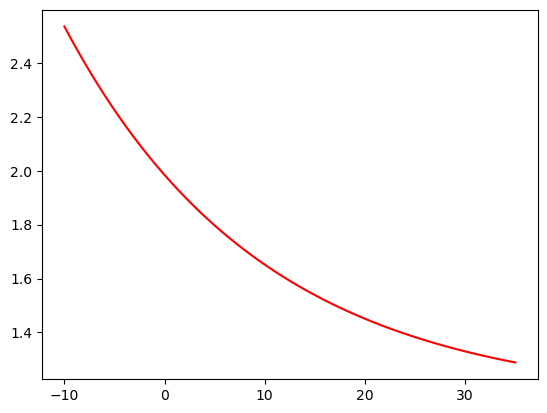

In [40]:
from scipy.optimize import curve_fit

def exponential_func(x, a, b, c):
    return a * np.exp(-b * x) + c

params, params_covariance = curve_fit(exponential_func, T_all, Q10_all)

x_fit = np.linspace(-10, 35, 100)
y_fit = exponential_func(x_fit, params[0], params[1], params[2])

plt.plot(x_fit, y_fit, 'r', label='Fit')


In [37]:
params[2]

1.1453594856931093

C:\Users\111\AppData\Local\Temp\ipykernel_13196\2409018260.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Blues')


"\nboxplot = ax1.boxplot([data1['Q10'], data2['Q10']],\n                whis = (5,95),\n                vert=True,  \n                patch_artist=True,\n                showfliers = False,\n                showmeans =True,\n                meanprops={'marker': '^', 'markersize': 6, 'color':'red'},\n                medianprops = {'color':'black'},\n                labels = ['Q10', 'Q10_lmx'],\n                widths=0.4,\n                capwidths=0.25,\n            )\n\nbox_color = 'white'\nbox_alpha = 1.0\nfor patch in boxplot['boxes']:\n    patch.set_facecolor(box_color)\n    patch.set_alpha(box_alpha)\n    patch.set_edgecolor('black')  # 设置箱体边框颜色为黑色\n    patch.set_linewidth(1)"

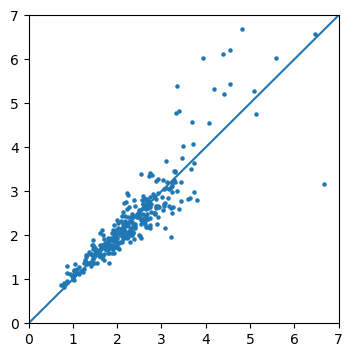

In [18]:
data1 = pd.read_csv('./Q10_site_year.csv')
data2 = pd.read_csv('./Q10_no_T_effect.csv')

m1,n1 = data1.shape
m2,n2 = data2.shape

Q10_1 = []
Q10_2 = []

site1 = data1['site'].values
year1 = data1['year'].values
Q101 = data1['Q10'].values
site2 = data2['site'].values
year2 = data2['year'].values
Q102 = data2['Q10'].values

for i in range(m1):
    for j in range(m2):
        if site1[i]==site2[j] and year1[i]==year2[j]: 
            Q10_1.append(Q101[i])
            Q10_2.append(Q102[j])


fig = plt.figure(figsize=(4, 4),dpi=100)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.4)
plt.rcParams['axes.unicode_minus'] = True
plt.rcParams['axes.linewidth'] = 0.8

ax = fig.add_subplot(1,1,1)
cm = plt.cm.get_cmap('Blues')


ax.scatter(Q10_1, Q10_2, s=5)
ax.plot([0,7], [0, 7])
ax.set_xlim(0,7);
ax.set_ylim(0,7);

'''
boxplot = ax1.boxplot([data1['Q10'], data2['Q10']],
                whis = (5,95),
                vert=True,  
                patch_artist=True,
                showfliers = False,
                showmeans =True,
                meanprops={'marker': '^', 'markersize': 6, 'color':'red'},
                medianprops = {'color':'black'},
                labels = ['Q10', 'Q10_lmx'],
                widths=0.4,
                capwidths=0.25,
            )

box_color = 'white'
box_alpha = 1.0
for patch in boxplot['boxes']:
    patch.set_facecolor(box_color)
    patch.set_alpha(box_alpha)
    patch.set_edgecolor('black')  # 设置箱体边框颜色为黑色
    patch.set_linewidth(1)'''

C:\Users\111\AppData\Local\Temp\ipykernel_16496\300718971.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Blues')


PearsonRResult(statistic=-0.2407473260654653, pvalue=8.112793441768224e-20)

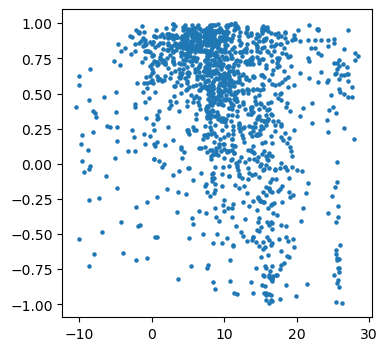

In [19]:
T_m

[array([6.26813275]),
 array([6.37668524]),
 array([25.60584532]),
 array([24.40025786]),
 array([0.24739976]),
 array([-2.34622424]),
 array([-2.347658]),
 array([-0.96066722]),
 array([0.21972892]),
 array([-2.16093265]),
 array([-2.27381086]),
 array([-0.58524727]),
 array([9.52395213]),
 array([10.05917123]),
 array([10.73680109]),
 array([10.33222597]),
 array([10.56193881]),
 array([3.24221173]),
 array([4.17388982]),
 array([2.9559412]),
 array([2.18639464]),
 array([2.21015631]),
 array([4.39645966]),
 array([3.49809437]),
 array([5.55090805]),
 array([3.73868482]),
 array([3.80430203]),
 array([2.91413185]),
 array([2.43358858]),
 array([4.86731113]),
 array([4.09534852]),
 array([5.08753042]),
 array([5.03293086]),
 array([3.59819384]),
 array([3.79041716]),
 array([4.06493288]),
 array([0.44699028]),
 array([7.87217398]),
 array([8.92623653]),
 array([9.63651821]),
 array([7.73594941]),
 array([9.45050597]),
 array([9.20546069]),
 array([10.49830607]),
 array([8.49029473]),
